In [131]:
import numpy as np
import pandas as pd
from numba import njit 

In [31]:
from collections import namedtuple
import numpy as np
Item = namedtuple("Item", ['index', 'value', 'weight'])

## Very basic swapping

In [34]:
def basic_swap(input_data):
    # Modify this code to run your optimization algorithm

    # parse the input
    #lines = input_data.split('\n')
    lines= list(input_data)

    firstLine = lines[0].split()
    item_count = int(firstLine[0])
    capacity = int(firstLine[1])

    items = []

    for i in range(1, item_count+1):
        line = lines[i]
        parts = line.split()
        items.append(Item(i-1, int(parts[0]), int(parts[1])))

    value = 0
    weight = 0
    taken = [0]*len(items)

    for item in items:
       if weight + item.weight <= capacity:
           taken[item.index] = 1
           value += item.value
           weight += item.weight


    # swapping
    for item_1 in items:
       if taken[item_1.index]==0:
           for item_2 in items:
               if taken[item_2.index]==1 and item_1.value>=item_2.value and weight - item_2.weight + item_1.weight<=capacity:
                   taken[item_1.index]=1
                   taken[item_2.index]=0
                   value+= (item_1.value -item_2.value)
                   weight+= (item_1.weight -item_2.weight)
    output_data = str(value) + ' ' + str(0) + '\n'
    output_data += ' '.join(map(str, taken))
    return output_data

In [35]:
with open('ks_lecture_dp_2.txt') as data:
    output=basic_swap(data)
output

'42 0\n0 1 0 0'

## Dynamic Programing using the list

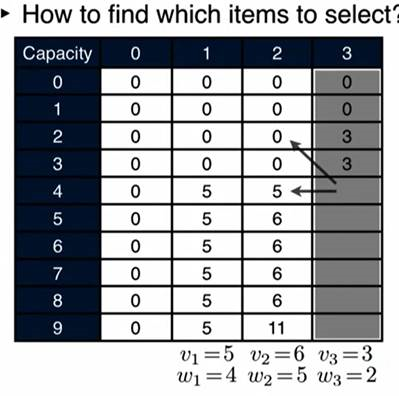

In [15]:
def test(input_data):
    
    # parse the input (use the following line when used in python file)
#     lines = input_data.split('\n')
    lines= list(input_data)

    firstLine = lines[0].split()
    item_count = int(firstLine[0])
    capacity = int(firstLine[1])

    items = []

    for i in range(1, item_count+1):
        line = lines[i]
        parts = line.split()
        items.append(Item(i-1, int(parts[0]), int(parts[1])))

    # a trivial greedy algorithm for filling the knapsack
    # it takes items in-order until the knapsack is full
#     value = 0
#     weight = 0
#     taken = [0]*len(items)

#     ##orginal
#     for item in items:
#         if weight + item.weight <= capacity:
#             taken[item.index] = 1
#             value += item.value
#             weight += item.weight
    
    value_table=[]

    for i in range(len(items)+1):
        value_list=[0]*(capacity+1) 
        if i!=0:
            if i<= len(items):
                item = items[i-1]
            
            for size in range(capacity+1):
             
                if size<item.weight:
                    ### have to use value_list, and then append(value_list)
                    value_list[size]=value_table[i-1][size]
                    #value_table[i].append(value_table[i-1][size])
                elif size==item.weight and value_table[i-1][size]<=item.value:
                    #value_table[i].append(item.value)
                    value_list[size]=item.value
                else:
                    value_list[size]=max(value_table[i-1][size], 
                                          item.value+value_table[i-1][size-item.weight])
        print('number of items:', i)
        value_table.append(value_list)
    
#     return value_table

    value=value_table[item_count][capacity]

    current_value=value
    current_capacity=capacity
    taken = [0]*len(items)
    for current_i in range(item_count-1,-1,-1):
        if value_table[current_i][current_capacity]<current_value:
            taken[current_i]=1
            current_value=value_table[current_i][current_capacity-items[current_i].weight]
            current_capacity-=items[current_i].weight
#             print('this is',current_i, current_capacity,current_value,taken[current_i])

    # prepare the solution in the specified output format
    output_data = str(value) + ' ' + str(0) + '\n'
    output_data += ' '.join(map(str, taken))
    return output_data

## Dynamic programming using Numba, replacing list with array
### In this case, the computation speeds up 1000 times!!!

In [23]:
def fast_test(input_data):
    
    # parse the input
#     lines = input_data.split('\n')
    lines= list(input_data)

    firstLine = lines[0].split()
    item_count = int(firstLine[0])
    capacity = int(firstLine[1])

    items=[]

    for i in range(1, item_count+1):
        line = lines[i]
        parts = line.split()
        items.append(Item(i-1, int(parts[0]), int(parts[1])))

    # a trivial greedy algorithm for filling the knapsack
    # it takes items in-order until the knapsack is full

    value,taken= fast_dp(items, item_count, capacity)
    # prepare the solution in the specified output format
    output_data = str(value) + ' ' + str(0) + '\n'
    output_data += ' '.join(map(str, taken))
    return output_data
    
@njit(fastmath=True)    
def fast_dp(items, item_count, capacity):
    
    value_table=np.zeros((item_count+1, capacity+1))
    
    for i in range(1,(item_count+1)):
        item = items[i-1]
        
        for size in range(capacity+1):

            if size<item.weight:
                ### have to use value_list, and then append(value_list)
                value_table[i][size]=value_table[i-1][size]
#             elif size==item.weight and value_table[i-1][size]<=item.value:
#                 value_list[size]=item.value
            else:
                value_table[i][size]=max(value_table[i-1][size], 
                                      item.value+value_table[i-1][size-item.weight])
        print('number of items:', i)
    
#     return value_table

    value=value_table[item_count][capacity]

    current_value=value
    current_capacity=capacity
#     taken = np.zeros(item_count)   ## it's a float array
    taken = [0]* item_count
    for current_i in range(item_count-1,-1,-1):
        if value_table[current_i][current_capacity]<current_value:
            taken[current_i]=1
            current_value=value_table[current_i][current_capacity-items[current_i].weight]
            current_capacity-=items[current_i].weight
#             print('this is',current_i, current_capacity,current_value,taken[current_i])
    return int(value), taken


In [10]:
with open('ks_400_0.txt') as data:
    output=fast_test(data)
output

number of items: 1
number of items: 2
number of items: 3
number of items: 4
number of items: 5
number of items: 6
number of items: 7
number of items: 8
number of items: 9
number of items: 10
number of items: 11
number of items: 12
number of items: 13
number of items: 14
number of items: 15
number of items: 16
number of items: 17
number of items: 18
number of items: 19
number of items: 20
number of items: 21
number of items: 22
number of items: 23
number of items: 24
number of items: 25
number of items: 26
number of items: 27
number of items: 28
number of items: 29
number of items: 30
number of items: 31
number of items: 32
number of items: 33
number of items: 34
number of items: 35
number of items: 36
number of items: 37
number of items: 38
number of items: 39
number of items: 40
number of items: 41
number of items: 42
number of items: 43
number of items: 44
number of items: 45
number of items: 46
number of items: 47
number of items: 48
number of items: 49
 50
number of items: 51
numbe

In [24]:
with open('ks_lecture_dp_2.txt') as data:
    output=fast_test(data)
output

number of items: 1
number of items: 2
number of items: 3
number of items: 4


'44 0\n1 0 0 1'

In [16]:
with open('ks_400_0.txt') as data:
    output=test(data)
output

In [7]:
output

'3967180.0 0\n0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.

In [63]:
with open('ks_lecture_dp_2.txt') as data:
#     k=list(data)
    kk=pd.DataFrame(list(data))
kk

0
0   4 7\n
1  16 2\n
2  19 3\n
3  23 4\n
4  28 5\n
5      \n

In [60]:
pd.DataFrame(output).transpose()

0   1   2   3   4
0  0   0   0   0   0
1  0   0   0   0   0
2  0  16  16  16  16
3  0  16  19  19  19
4  0  16  19  23  23
5  0  16  35  35  35
6  0  16  35  39  39
7  0  16  35  42  44

## Depth-first branch and bound

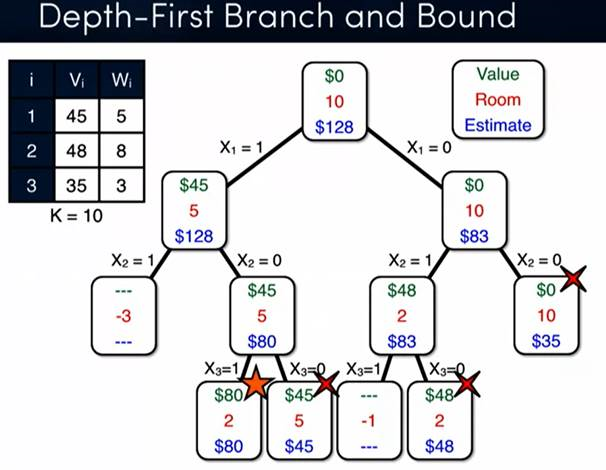

In [168]:
def relax_est(items, capacity):
    sorted_items= sorted(items, key=lambda x: x.vd)
    estimate=0.0
    while capacity>0 and sorted_items != []:
        item=sorted_items.pop()
        choose=min(1,capacity/item.weight)
        capacity-=choose* item.weight
        estimate+=choose * item.value
    return estimate

In [165]:
mm=[1]
mm.pop()
mm==False

False

In [38]:
Person = namedtuple('Person', 'name age score')
seq = [
    Person(name='nick', age=23, score=100),
    Person(name='bob', age=25, score=200),
]

y=sorted(seq, key=lambda x: x.age, reverse=True)

In [76]:
tree= [(0, 0,1, 2)]
tree.append(1)
tree

[(0, 0, 1, 2), 1]

In [194]:
Item = namedtuple("Item", ['index', 'value', 'weight', 'vd'])
def df_BaB(input_data):

    # parse the input
    #lines = input_data.split('\n')
    lines= list(input_data)

    firstLine = lines[0].split()
    item_count = int(firstLine[0])
    capacity = int(firstLine[1])

    items = []
    
    for i in range(1, item_count+1):
        line = lines[i]
        parts = line.split()
        items.append(Item(i-1, int(parts[0]), int(parts[1]), float(parts[0])/float(parts[1])))
    
    ##namedtuples are immutatble
    tree_node= namedtuple('tree_node', ['value', 'weight', 'estimate', 'taken'])
    tree= [tree_node(0, 0, relax_est(items, capacity),[0]*item_count)]
    num=0
    while items!= []:
        print('adding item', num)
        num+=1
        item= items.pop(0)
        # Namedtuples object has to be re-defined inside the while loop.
        ## becuase it's a new class, rather than a variable
        tree_node= namedtuple('tree_node', ['value', 'weight', 'estimate', 'taken'])
        print('# of possible nodes: ', len(tree))
        for i in range(len(tree)):
            old_node=tree.pop(0)          

            x=relax_est(items, capacity-old_node.weight)
            no_taken_item_node=tree_node(int(old_node.value), int(old_node.weight), float(x),old_node.taken)

            new_taken=[]
            for i in old_node.taken:
                new_taken.append(i)
            
            new_taken[item.index]=1
            x=relax_est(items, capacity-old_node.weight-item.weight)
            take_item_node=tree_node(value=(old_node.value+item.value), weight=(old_node.weight+item.weight), 
                                estimate= x, taken=new_taken)
            
            ### infeasibility check: capacity constraint
            if take_item_node.weight<=capacity:
                tree.append(take_item_node)
            tree.append(no_taken_item_node)    
#             if take_item_node.value<=no_taken_item_node.value+ no_taken_item_node.estimate:
#                 tree.append(no_taken_item_node)
#             print(tree)
                
        tree=sorted(tree, key=lambda x: x.value, reverse=True)
        opt_value=tree[0].value
        
        ### the branch with low estimates would be cut off
        next_tree= [tree[0]]
        for tree_node in tree[1:]:
            if tree_node.value+tree_node.estimate>opt_value:
                next_tree.append(tree_node)
        tree=next_tree
        
    tree=sorted(tree, key=lambda x: x.value, reverse=True)
    value= tree[0].value
    taken= tree[0].taken

    output_data = str(value) + ' ' + str(0) + '\n'
    output_data += ' '.join(map(str, taken))
    return output_data

In [196]:
with open('ks_400_0.txt') as data:
    output=df_BaB(data)
output

adding item 0
# of possible nodes:  1
adding item 1
# of possible nodes:  2
adding item 2
# of possible nodes:  4
adding item 3
# of possible nodes:  8
adding item 4
# of possible nodes:  16
adding item 5
# of possible nodes:  32
adding item 6
# of possible nodes:  64
adding item 7
# of possible nodes:  128
adding item 8
# of possible nodes:  256
adding item 9
# of possible nodes:  512
adding item 10
# of possible nodes:  1024
adding item 11
# of possible nodes:  2048
adding item 12
# of possible nodes:  4096
adding item 13
# of possible nodes:  8192
adding item 14
# of possible nodes:  16384
adding item 15
# of possible nodes:  32768
adding item 16
# of possible nodes:  65536
adding item 17
# of possible nodes:  131072
adding item 18
# of possible nodes:  262144


KeyboardInterrupt: 